In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [23]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

* explore dataframe

In [3]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df = pd.get_dummies(df,columns=["Genre"])

In [31]:
df = df.rename(columns={"Genre_Male":"Sex"})

In [30]:
df = df.drop(["Genre_Female"],axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [5]:
n_missing = df.isnull().sum().sort_values(ascending=False)
p_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
missing

,number,percent
Spending Score (1-100),0,0.0
Annual Income (k$),0,0.0
Age,0,0.0
Genre,0,0.0
CustomerID,0,0.0


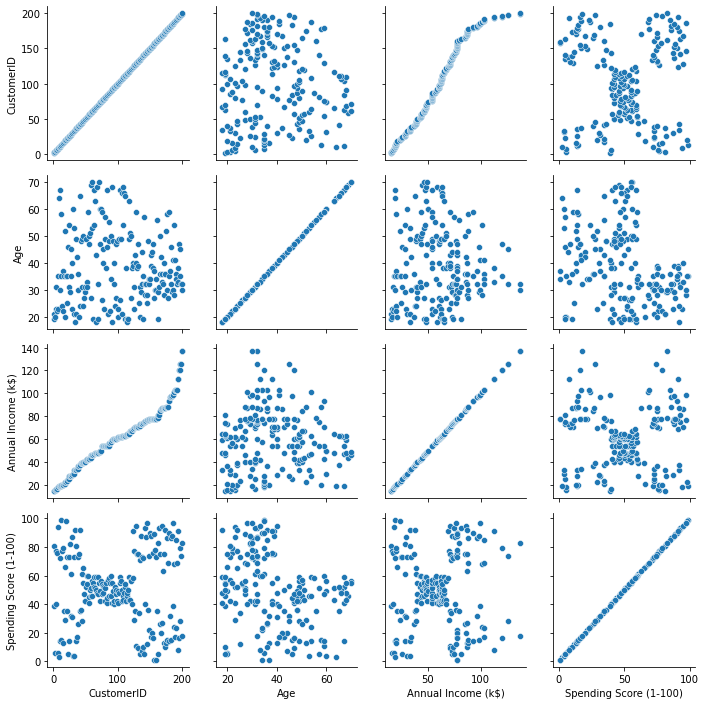

In [10]:
import seaborn as sns

g = sns.PairGrid(df)
g.map(sns.scatterplot)

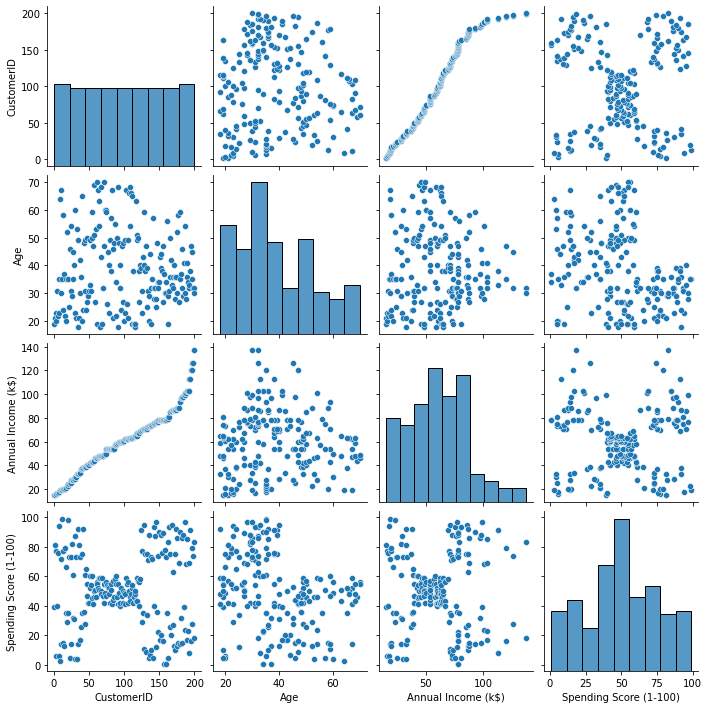

In [11]:
sns.pairplot(df)

## Objective: 
- Fit K-Means, 
- find optimal number of clusters using elbow rule, 
- and plot clusters.

To simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset. There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though, it's **not a must** in the case because we take only the last two columns and they have similar scale.

In [82]:
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

from sklearn.preprocessing import Normalizer

In [95]:
col = ["Annual Income (k$)","Spending Score (1-100)"]
df2 = df[col]

scaler = StandardScaler()
scaler.fit(df2)

n = Normalizer()
n.fit(df2)

data_normal = n.transform(df2)
data_scale = scaler.transform(df2)

x_scale = data_scale[:,0]
y_scale = data_scale[:,1]

In [96]:
x_scale = x_scale.reshape(-1, 1)

In [97]:
#elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    

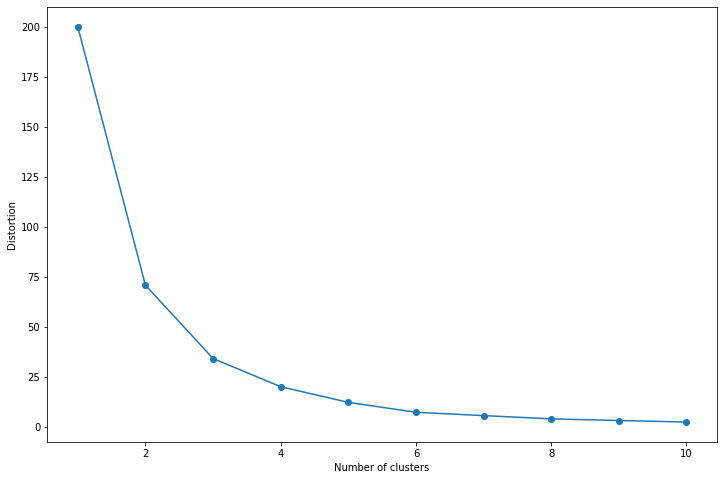

In [98]:
plot_distortion(x_scale)

In [88]:
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [99]:
silhouette(x_scale)

[(2, 0.5622996282314814),
 (3, 0.5630778156006976),
 (4, 0.5480456468236651),
 (5, 0.5836461109257969),
 (6, 0.6016527991635555),
 (7, 0.599479158535762),
 (8, 0.6092272654893596),
 (9, 0.590207585752235)]

In [ ]:
# 3 looks good

* fit model with optimal number of clusters

In [100]:
km = KMeans(
    n_clusters = 3,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(x_scale)

* define function plot_clusters

In [105]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

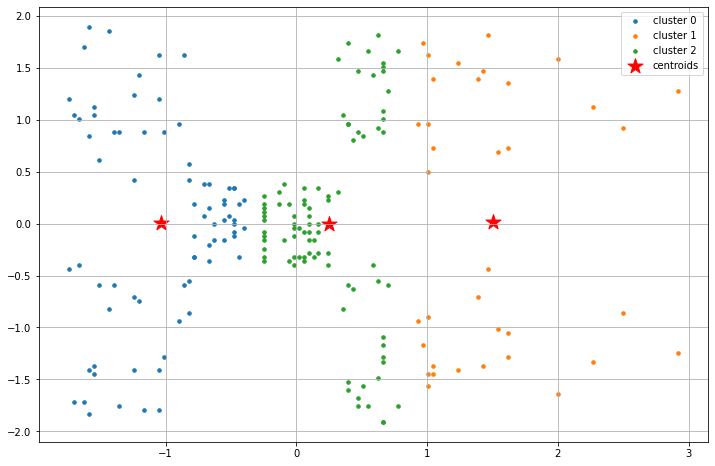

In [106]:
plot_clusters(data_scale, y_km, plt_cluster_centers= True)